# Performing Exploratory Data Analysis

Aim : Performing Exploratory Data Analysis on 'SuperStore' dataset
and spot weak areas to maximize business outcome

In [7]:
#Rahul Ganesan
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

#importing the dataset
dataset=pd.read_csv('SampleSuperstore.csv')
dataset.head()



Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [8]:
#getting no of rows and columns
dataset.shape

(9994, 13)

In [9]:
dataset.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [10]:
#checking for unique items
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
#checking for any null value
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
#drop unnecessary features as it hinders with model using intuition
new_dataset=dataset.drop(['Country', 'City', 'Postal Code','Region'],axis=1)
new_dataset.head()


Ship Mode    Segment       State         Category Sub-Category  \
0    Second Class   Consumer    Kentucky        Furniture    Bookcases   
1    Second Class   Consumer    Kentucky        Furniture       Chairs   
2    Second Class  Corporate  California  Office Supplies       Labels   
3  Standard Class   Consumer     Florida        Furniture       Tables   
4  Standard Class   Consumer     Florida  Office Supplies      Storage   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

# Visualising resuts

<AxesSubplot:>

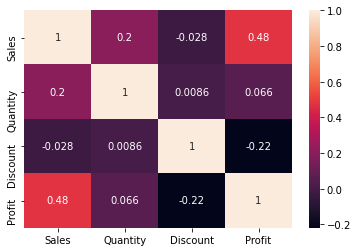

In [13]:
#1.Heatmaps
corelation=new_dataset.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

# Relation between Category, profit, & Segment

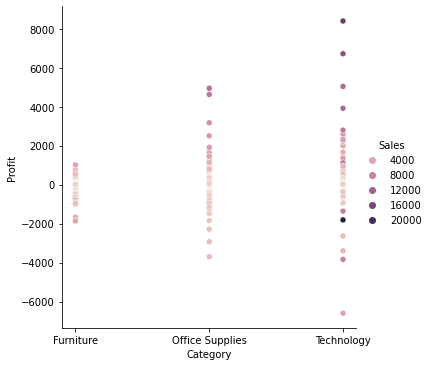

In [14]:
sns.relplot(x='Category',y='Profit',hue='Sales', data=new_dataset)

# Relation between Category, Profit, & Ship Mode

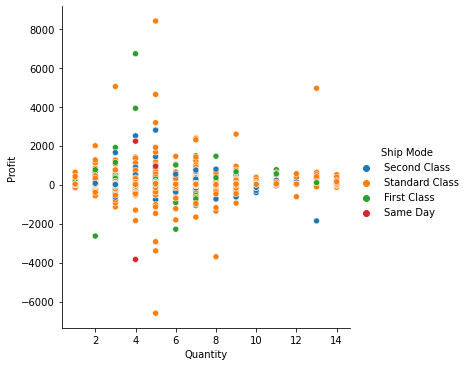

In [15]:
sns.relplot(x='Quantity',y='Profit',hue='Ship Mode', data=new_dataset)

# Exploring Sales count by Segemt distribution

<AxesSubplot:xlabel='Segment', ylabel='Count'>

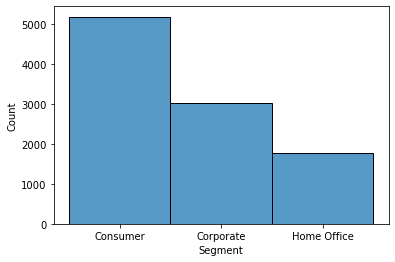

In [16]:
sns.histplot(new_dataset['Segment'],bins=25)

# Exploring Sales count by Category distribution

<AxesSubplot:xlabel='Category', ylabel='Count'>

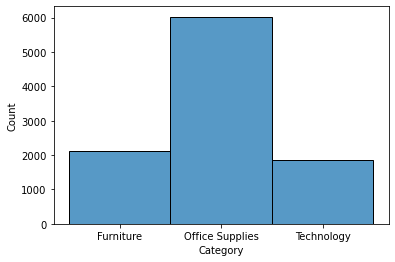

In [18]:
sns.histplot(new_dataset['Category'],bins=25)
#hence it is advisable to increase technology and furniture sales

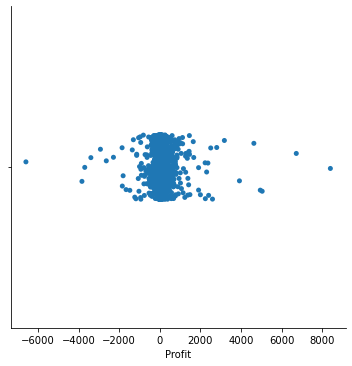

In [19]:
sns.catplot(x='Profit', kind='swarm',data=new_dataset)